# LIBRAIRIES

In [1]:
# Librairies importation 

import os
import cv2
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
from tensorflow.keras.preprocessing.image import load_img
from sklearn.model_selection import train_test_split
from tensorflow.keras.applications import VGG16
from tensorflow.keras.layers import Input,Flatten,Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.models import load_model, Model
from tensorflow.keras.preprocessing.image import img_to_array

ModuleNotFoundError: No module named 'cv2'

In [3]:
# Images filenames
images_filenames = []
images_folder = "/Users/hhh594/OneDrive - Wavestone/Bureau/UDSC/Code/image/"
for filename in os.listdir(images_folder):
    images_filenames.append(filename)

print('Images filenames :', images_filenames)


# Labels filenames
labels_filenames = []
labels_filenames_folder = 'C:\\Users\\hhh594\\OneDrive - Wavestone\\Bureau\\UDSC\\Code\\label\\'
for filename in os.listdir(labels_filenames_folder):
    labels_filenames.append(str(filename))

print('Labels filenames :', labels_filenames)


# Labels 
labels = []
for i in range(len(labels_filenames)):
    folder = os.path.join(labels_filenames_folder, labels_filenames[i])
    with open(folder) as f:
        mylist = [line.rstrip('\n') for line in f]
    a = mylist[0].split(' ')
    a.remove('0')
    labels.append(a)

print('Labels :', labels)

FileNotFoundError: [WinError 3] Systém nemůže nalézt uvedenou cestu: '/Users/hhh594/OneDrive - Wavestone/Bureau/UDSC/Code/image/'

# PREPROCESSING

In [ ]:
# Cleaning a wrong format: [x y width height]
print(labels[139])
labels[139].remove('')
print(labels[139])

['', '127', '67', '223.0', '152.0']
['127', '67', '223.0', '152.0']


In [ ]:
# Transformation in integer
int_Labels = []
for k in range(len(labels)):
    a = [float(i) for i in labels[k]]
    int_Labels.append(a)
Labels = np.array(int_Labels)
Labels = Labels.astype(int)
Labels = Labels.astype(str)

print("Cleaned labels :", Labels)

NameError: name 'labels' is not defined

In [ ]:
# Store filenames and cleaned groundtruth in G
C1 = []
C2 = []
C3 = []
C4 = []
for i in range(len(Labels)):
    C1.append(Labels[i][0])
    C2.append(Labels[i][1])
    C3.append(Labels[i][2])
    C4.append(Labels[i][3])
G = []
for i in range(len(labels_filenames)):
    G.append(images_filenames[i]+',' + str(C1[i]) + ',' + str(C2[i]) + ',' + str(C3[i]) + ','+str(C4[i]))

NameError: name 'Labels' is not defined

In [ ]:
print(G)

['03012017-dji-phantom-flying-sky-260nw-554568589.jpg,220,100,138,84', '03012017-dji-phantom-flying-sky-260nw-554568607.jpg,134,49,373,192', '03012017-dji-phantom-flying-sky-260nw-554568664.jpg,112,49,146,126', '03012017-dji-phantom-flying-sky-260nw-554568724.jpg,134,90,132,103', '03012017-dji-phantom-flying-sky-260nw-555436891.jpg,32,107,297,149', '03012017-dji-phantom-flying-sky-260nw-555436894.jpg,64,54,241,156', '03012017-dji-phantom-flying-sky-260nw-555436897.jpg,40,43,304,172', '03012017-dji-phantom-flying-sky-260nw-555436900.jpg,84,74,223,98', '03012017-dji-phantom-flying-sky-260nw-555436903.jpg,165,100,127,62', '09-february-2017-ufa-russia-260nw-1062076784.jpg,61,72,313,180', '09-february-2017-ufa-russia-260nw-1062076787.jpg,59,27,356,204', '09-february-2017-ufa-russia-260nw-1062173864.jpg,24,27,359,214', '18th-july-2017-kuantanpahangmalaysia-dji-260nw-681114880.jpg,42,123,206,98', '18th-july-2017-kuantanpahangmalaysia-dji-260nw-681114889.jpg,58,74,300,168', '18th-july-2017-kua

In [ ]:
base_path = "/Users/claire.delgove/OneDrive - Wavestone/Bureau/UDSC/Code/"
images = os.path.sep.join([base_path,'image'])

# Pre-processing 
data = []
targets = []
filenames = []
for row in G :
  row = row.split(",")
  (filename,X ,Y, W, H) = row
  
  imagepaths = os.path.sep.join([images,filename])
  image = cv2.imread(imagepaths)
  (h,w) = image.shape[:2]
  
  X2 = (int(X)/w)*224
  Y2 = (int(Y)/h)*224
  W2 = (int(W)/w)*224
  H2 = (int(H)/h)*224
  
  image = load_img(imagepaths,target_size=(224,224))
  image = img_to_array(image)

  targets.append([X2,Y2,W2,H2])
  filenames.append(filename)
  data.append(image)

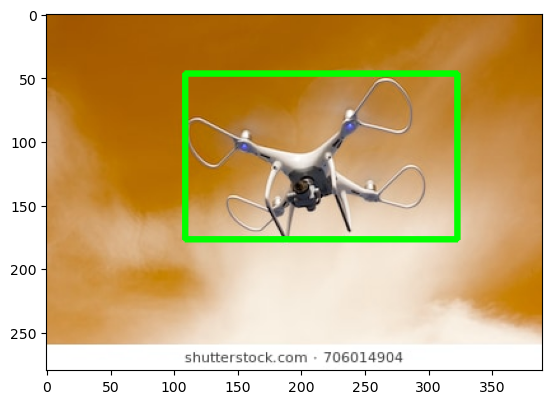

In [ ]:
# Visualization of one image with groundtruth
indice = 100
name = images_filenames[indice]
X2 = Labels[indice][0]
Y2 = Labels[indice][1]
W2 = Labels[indice][2]
H2 = Labels[indice][3]

imagepath='/Users/claire.delgove/OneDrive - Wavestone/Bureau/UDSC/Code/image/' + name
image=cv2.imread(imagepath)
cv2.rectangle(image,(int(X2),int(Y2)),(int(X2)+int(W2),int(Y2)+int(H2)),(0,255,0),3)
plt.imshow(image)

In [ ]:
# Normalization
data = np.array(data,dtype='float32') / 255.0
targets = np.array(targets,dtype='float32') / 224

# Split the dataset
split = train_test_split(data,targets,filenames,test_size=0.20,random_state=42)
(train_images,test_images) = split[:2]
(train_targets,test_targets) = split[2:4]
(train_filenames,test_filenames) = split[4:]


# MODEL VGG16

In [4]:
# Model
vgg=tf.keras.applications.VGG16(weights='imagenet',include_top=False,input_tensor=Input(shape=(224,224,3)))
vgg.summary()

# Transfer Learning
vgg.trainable = False
flatten = vgg.output
flatten = Flatten()(flatten)
bboxhead = Dense(256,activation="relu")(flatten) 
bboxhead = Dense(128,activation="relu")(bboxhead) 
bboxhead = Dense(64,activation="relu")(bboxhead)
bboxhead = Dense(32,activation="relu")(bboxhead)
bboxhead = Dense(4,activation="relu")(bboxhead)

model = Model(inputs = vgg.input,outputs = bboxhead)
model.summary()
opt = Adam(1e-4) 
model.compile(loss='mse',optimizer=opt,metrics=['accuracy'])
history = model.fit(train_images,train_targets,validation_data=(test_images,test_targets),
                    batch_size=32,epochs=10 ,verbose=1)

58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 6s 0us/step


Model: "vgg16"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv1 (Conv2D)           │ (None, 224, 224, 64)   │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv2 (Conv2D)           │ (None, 224, 224, 64)   │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_pool (MaxPooling2D)      │ (None, 112, 112, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv1 (Conv2D)           │ (None, 112, 112, 128)  │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv2 (Conv2D)           │ (None, 112, 112, 128)  │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_pool (MaxPooling2D)      │ (None, 56, 56, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv1 (Conv2D)           │ (None, 56, 56, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv2 (Conv2D)           │ (None, 56, 56, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv3 (Conv2D)           │ (None, 56, 56, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_pool (MaxPooling2D)      │ (None, 28, 28, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv1 (Conv2D)           │ (None, 28, 28, 512)    │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv2 (Conv2D)           │ (None, 28, 28, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv3 (Conv2D)           │ (None, 28, 28, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_pool (MaxPooling2D)      │ (None, 14, 14, 512)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv1 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv2 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv3 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_pool (MaxPooling2D)      │ (None, 7, 7, 512)      │             0 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 14,714,688 (56.13 MB)

 Trainable params: 14,714,688 (56.13 MB)

 Non-trainable params: 0 (0.00 B)

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv1 (Conv2D)           │ (None, 224, 224, 64)   │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv2 (Conv2D)           │ (None, 224, 224, 64)   │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_pool (MaxPooling2D)      │ (None, 112, 112, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv1 (Conv2D)           │ (None, 112, 112, 128)  │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv2 (Conv2D)           │ (None, 112, 112, 128)  │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_pool (MaxPooling2D)      │ (None, 56, 56, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv1 (Conv2D)           │ (None, 56, 56, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv2 (Conv2D)           │ (None, 56, 56, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv3 (Conv2D)           │ (None, 56, 56, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_pool (MaxPooling2D)      │ (None, 28, 28, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv1 (Conv2D)           │ (None, 28, 28, 512)    │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv2 (Conv2D)           │ (None, 28, 28, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv3 (Conv2D)           │ (None, 28, 28, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_pool (MaxPooling2D)      │ (None, 14, 14, 512)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv1 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv2 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv3 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_pool (MaxPooling2D)      │ (None, 7, 7, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 25088)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 256)            │     6,422,784 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 4)              │           13

 Total params: 21,180,836 (80.80 MB)

 Trainable params: 6,466,148 (24.67 MB)

 Non-trainable params: 14,714,688 (56.13 MB)

NameError: name 'train_images' is not defined

In [ ]:
#model.save('detect_drones_DSC_16.h5')

model = load_model('/Users/claire.delgove/OneDrive - Wavestone/Bureau/UDSC/Code/detect_drones_DSC_16.h5', custom_objects={'mse': 'mse'})

# GROUNDTRUTH

In [ ]:
def groundtruth(indicedansZ):
  row = G[indicedansZ].split(",")
  (filename,X,Y,W,H)=row 
  imagepaths=os.path.sep.join([images,filename])
  image=cv2.imread(imagepaths)
  # Print groundtruth bounding boxes
  cv2.rectangle(image,(int(X),int(Y)),(int(X)+int(W),int(Y)+int(H)),(0,255,0),3) # grountruth
  plt.imshow(image)
  cv2.waitKey(0)

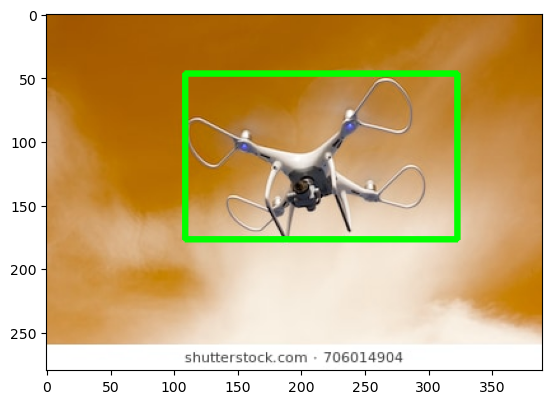

In [ ]:
groundtruth(100)

# PREDICTIONS

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


-1

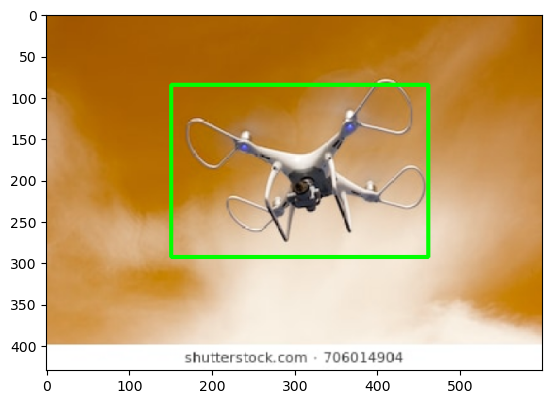

In [ ]:
import imutils

indice = 100
name = images_filenames[indice]
imagepath='/Users/claire.delgove/OneDrive - Wavestone/Bureau/UDSC/Code/image/'+ name
image = load_img(imagepath,target_size=(224,224))
image = img_to_array(image) / 255.0
image = np.expand_dims(image,axis=0)

preds=model.predict(image)[0]
(X2,Y2,W2,H2)=preds*224


image=cv2.imread(imagepath)
image=imutils.resize(image,width=600)
(h,w)=image.shape[:2]
X=(X2/224)*w
Y=(Y2/224)*h
W=(W2/224)*w
H=(H2/224)*h

cv2.rectangle(image,(int(X),int(Y)),(int(X)+int(W),int(Y)+int(H)),(0,255,0),3)

plt.imshow(image)
cv2.waitKey(0)


# BOTH

In [ ]:
def bb_intersection_over_union(boxA, boxB):
    # determine the (x, y)-coordinates of the intersection rectangle
    xA = int(max(boxA[0], boxB[0]))
    yA = int(max(boxA[1], boxB[1]))
    xB = int(min(boxA[2], boxB[2]))
    yB = int(min(boxA[3], boxB[3]))
    # compute the area of intersection rectangle
    interArea = max(0, xB - xA + 1) * max(0, yB - yA + 1)
    # compute the area of both the prediction and ground-truth
    # rectangles
    boxAArea = (int(boxA[2]) - int(boxA[0]) + 1) * (int(boxA[3]) - int(boxA[1]) + 1)
    boxBArea = (int(boxB[2]) - int(boxB[0]) + 1) * (int(boxB[3]) - int(boxB[1]) + 1)
    # compute the intersection over union by taking the intersection
    # area and dividing it by the sum of prediction + ground-truth
    # areas - the interesection area
    iou = interArea / float(boxAArea + boxBArea - interArea)
    # return the intersection over union value
    return iou

In [ ]:
# Print both bounding boxes for the image selected 
def bothboxes(indicedansZ):
  row = G[indicedansZ].split(",")
  (filename,X,Y,W,H)=row
  
  # Pathway
  imagepaths=os.path.sep.join([images,filename])

  # Compress for the prediction
  image = load_img(imagepaths,target_size=(224,224))
  image = img_to_array(image)/255.0
  image = np.expand_dims(image,axis=0)
  
  # Prediction
  preds = model.predict(image)[0]
  (X2,Y2,W2,H2)=preds*224

  # Real image with prediction X1...
  image = cv2.imread(imagepaths)
  # image=imutils.resize(image,width=600)
  (h,w) = image.shape[:2]
  X1 = (X2/224)*w
  Y1 = (Y2/224)*h
  W1 = (W2/224)*w
  H1 = (H2/224)*h
  
  cv2.rectangle(image,(int(X),int(Y)),(int(X)+int(W),int(Y)+int(H)),(0,255,0),3) # groundtruth
  cv2.rectangle(image,(int(X1),int(Y1)),(int(X1)+int(W1),int(Y1)+int(H1)),(255,0,0),3)
  
  iou = bb_intersection_over_union(np.array([int(X),int(Y),int(W),int(H)]), np.array([int(X1),int(Y1),int(W1),int(H1)]))

  font = cv2.FONT_HERSHEY_SIMPLEX
  org = (20, 30)
  fontScale = 1
  color = (0, 0, 0)
  thickness = 2
  image = cv2.putText(image, "IoU: {:.4f}".format(iou), org, font, fontScale, color, thickness, cv2.LINE_AA)
  
  plt.imshow(image)
  cv2.waitKey(0)

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 715ms/step


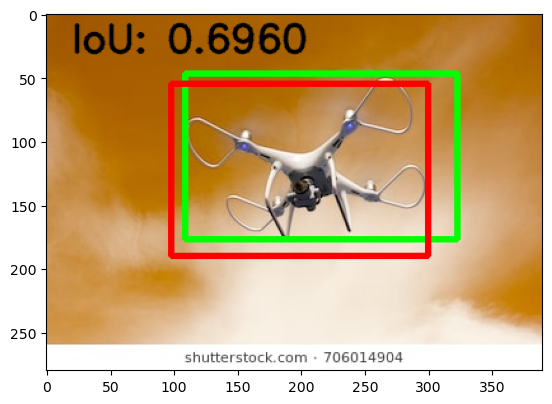

In [ ]:
bothboxes(100)

# MODEL VGG19

In [ ]:
# Model
from tensorflow.keras.applications.vgg19 import VGG19

vgg=tf.keras.applications.VGG19(weights='imagenet',include_top=False,input_tensor=Input(shape=(224,224,3)))
vgg.summary()

# Transfer Learning
vgg.trainable = False
flatten = vgg.output
flatten = Flatten()(flatten)
bboxhead = Dense(256,activation="relu")(flatten) 
bboxhead = Dense(128,activation="relu")(bboxhead) 
bboxhead = Dense(64,activation="relu")(bboxhead)
bboxhead = Dense(32,activation="relu")(bboxhead)
bboxhead = Dense(4,activation="relu")(bboxhead)

model = Model(inputs = vgg.input,outputs = bboxhead)
model.summary()
opt = Adam(1e-4) 
model.compile(loss='mse',optimizer=opt,metrics=['accuracy'])
history = model.fit(train_images,train_targets,validation_data=(test_images,test_targets),
                    batch_size=32,epochs=10 ,verbose=1)

Model: "vgg19"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_10 (InputLayer)     │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv1 (Conv2D)           │ (None, 224, 224, 64)   │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv2 (Conv2D)           │ (None, 224, 224, 64)   │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_pool (MaxPooling2D)      │ (None, 112, 112, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv1 (Conv2D)           │ (None, 112, 112, 128)  │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv2 (Conv2D)           │ (None, 112, 112, 128)  │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_pool (MaxPooling2D)      │ (None, 56, 56, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv1 (Conv2D)           │ (None, 56, 56, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv2 (Conv2D)           │ (None, 56, 56, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv3 (Conv2D)           │ (None, 56, 56, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv4 (Conv2D)           │ (None, 56, 56, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_pool (MaxPooling2D)      │ (None, 28, 28, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv1 (Conv2D)           │ (None, 28, 28, 512)    │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv2 (Conv2D)           │ (None, 28, 28, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv3 (Conv2D)           │ (None, 28, 28, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv4 (Conv2D)           │ (None, 28, 28, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_pool (MaxPooling2D)      │ (None, 14, 14, 512)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv1 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv2 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv3 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv4 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_pool (MaxPooling2D)      │ (None, 7, 7, 512)      │             0 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 20,024,384 (76.39 MB)

 Trainable params: 20,024,384 (76.39 MB)

 Non-trainable params: 0 (0.00 B)

Model: "functional_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_10 (InputLayer)     │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv1 (Conv2D)           │ (None, 224, 224, 64)   │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv2 (Conv2D)           │ (None, 224, 224, 64)   │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_pool (MaxPooling2D)      │ (None, 112, 112, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv1 (Conv2D)           │ (None, 112, 112, 128)  │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv2 (Conv2D)           │ (None, 112, 112, 128)  │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_pool (MaxPooling2D)      │ (None, 56, 56, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv1 (Conv2D)           │ (None, 56, 56, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv2 (Conv2D)           │ (None, 56, 56, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv3 (Conv2D)           │ (None, 56, 56, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv4 (Conv2D)           │ (None, 56, 56, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_pool (MaxPooling2D)      │ (None, 28, 28, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv1 (Conv2D)           │ (None, 28, 28, 512)    │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv2 (Conv2D)           │ (None, 28, 28, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv3 (Conv2D)           │ (None, 28, 28, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv4 (Conv2D)           │ (None, 28, 28, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_pool (MaxPooling2D)      │ (None, 14, 14, 512)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv1 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv2 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv3 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv4 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_pool (MaxPooling2D)      │ (None, 7, 7, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_7 (Flatten)             │ (None, 25088)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_17 (Dense)                │ (None, 256)            │     6,422,784 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_18 (Dense)                │ (None, 128)            │        32,89

 Total params: 26,490,532 (101.05 MB)

 Trainable params: 6,466,148 (24.67 MB)

 Non-trainable params: 20,024,384 (76.39 MB)

Epoch 1/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 94s 12s/step - accuracy: 0.4057 - loss: 0.0804 - val_accuracy: 0.4762 - val_loss: 0.0495
Epoch 2/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 88s 11s/step - accuracy: 0.4971 - loss: 0.0418 - val_accuracy: 0.5397 - val_loss: 0.0291
Epoch 3/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 105s 14s/step - accuracy: 0.6356 - loss: 0.0162 - val_accuracy: 0.5556 - val_loss: 0.0210
Epoch 4/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 119s 16s/step - accuracy: 0.7030 - loss: 0.0101 - val_accuracy: 0.6667 - val_loss: 0.0144
Epoch 5/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 123s 15s/step - accuracy: 0.7499 - loss: 0.0070 - val_accuracy: 0.6667 - val_loss: 0.0118
Epoch 6/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 116s 13s/step - accuracy: 0.7918 - loss: 0.0043 - val_accuracy: 0.6508 - val_loss: 0.0117
Epoch 7/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 104s 13s/step - accuracy: 0.7830 - loss: 0.0027 - val_accuracy: 0.6508 - val_loss: 0.0109
Epoch 8/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 95s 12s/step - accuracy: 0.8690 - loss: 0.0021 - val_accuracy: 0.6825 - val_loss: 0.

In [ ]:
# model.save('detect_drones_DSC_19.h5')

model = load_model('/Users/claire.delgove/OneDrive - Wavestone/Bureau/UDSC/Code/detect_drones_DSC_19.h5', custom_objects={'mse': 'mse'})

In [ ]:
epochs = 10

# # Tr and Val accuracy curves
# plt.plot(history.history['accuracy'])
# plt.plot(history.history['val_accuracy'])
# plt.ylabel('accuracy')
# plt.xlabel('epoch')
# plt.ylim(0,1)
# plt.title('Training and validation accuracy curves')
# plt.legend(['train', 'test'], loc='upper left')
# plt.show()

# DATA AUGMENTATION

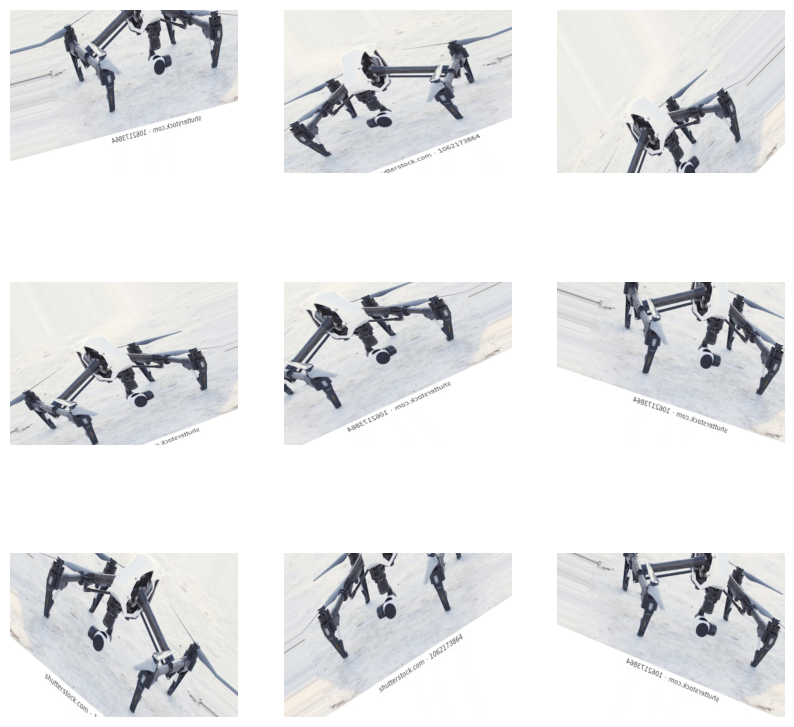

In [ ]:
# Create an instance of the ImageDataGenerator class
datagen = tf.keras.preprocessing.image.ImageDataGenerator(
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

# Load an example image (replace with your own image path)
img = plt.imread('/Users/claire.delgove/OneDrive - Wavestone/Bureau/UDSC/Code/image/'+'09-february-2017-ufa-russia-260nw-1062173864.jpg')
img = np.expand_dims(img, axis=0)

# Generate augmented images
augmented_images = datagen.flow(img, batch_size=1)

# Plot the original and augmented images
plt.figure(figsize=(10, 10))
for i in range(9):
    plt.subplot(3, 3, i + 1)
    batch = next(augmented_images)
    image = batch[0].astype('uint8')
    plt.imshow(image)
    plt.axis('off')
plt.show()